<a href="https://colab.research.google.com/github/shkabh/HW3/blob/main/HW3__Part1_NYC_Post_Prison_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** reproduce the result in **
http://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf

In [48]:
import os
import sys
import numpy as np
import pylab as pl

In [49]:
def evalChisq(values):
    values = np.array(values)
    E = np.empty_like(values)
    for j in range(len(values[0])):
        for i in range(2):

            E[i][j] = ((values[i,:].sum() * values[:,j].sum()) /
                        (values).sum())
    return ((values - E)**2 / E).sum()

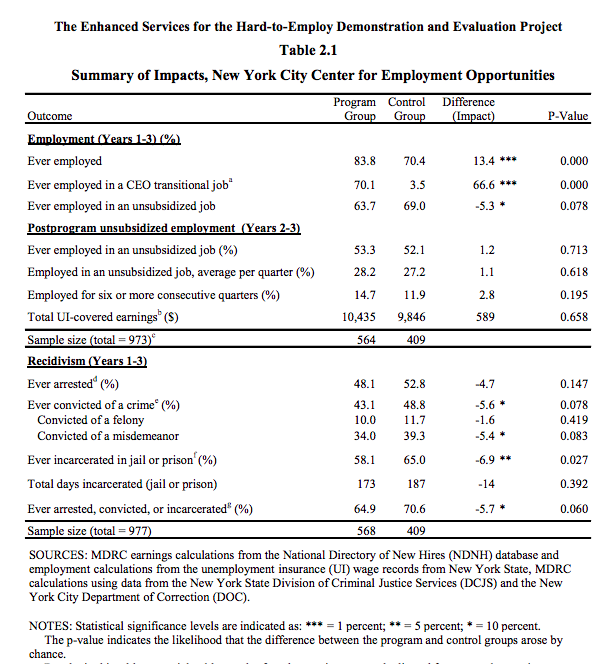

In [ ]:
Image(filename='../plotsforclasses/NYCReentryprogram.png')

### Null Hypothesis: The % of former prisoners who were convicted of a felony after release is the same or lower for people who participated in the program when compared to the people who are in the control group.



**$H_0: P_0 - P_1 \geq$    0**
    
**$H_a: P_0 - P_1$ < 0**

**$\alpha$ = 0.05**

This is a test of proportions. We use the Binomial distribution since it is a yes/no (Bernulli) test for each subject: the former inmate did or did not get convicted for a felony.

**$P_0=0.117, P_1=0.1$**

**Contingency Table - Convicted of a Felony**

| Convicted of a Felony    |    Yes    |     No    |      # of People      |  
|---------------------------|-----------|-----------|----------------|
| Test Sample               |     0.1 * 568  = 56.8    |      0.9 * 568  = 511.2   |        568        |
|Control Sample            |      0.117 * 409  = 47.853   |     0.883 * 409 = 361.147     |        409        |
|                           |           |           |                |
| Total                     |     104.653      |     872.347      |       977         |

In [50]:
# Do I need to test significance?

alpha=0.05

# 0 for control group, 1 for program group

P_0 = 11.7 * 0.01
P_1 = 10.0 * 0.01

if P_0 - P_1 >= 0:
    # we are done
    print ("The null hypothesis is not rejected.")
else:
    print ("we must assess the statistical significance")

#sample sizes

n_0 = 409
n_1 = 568

#lets get the counts by multiplying by the sample size

Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

The null hypothesis is not rejected.


In [51]:
# Let's do the chi-squared anyway

Ntot = 977 # a + b + c + d = tot

sample_values = np.array([[0.1 * 568, 0.9 * 568], [0.117 * 409, 0.883 * 409]])

print (evalChisq(sample_values))

0.7184939175052887


### Since our p-value is 0.05 and there is 1 degree of freedom, the chi-squared statistic that we need to compare the calculated chi-squared value to is 3.84.

# The calculated chi-squared value is 0.7185. Since 0.7185 is less than 3.84, the null hypothesis is not rejected.

## Chi-Squared for % of prisoners employed after release.

This number must be compared to the chi sq distribution.
You must calculate the number of degrees of freedom forthis experiment.
Generally: DOF = Number of observations - number of Independent Variables

so here DOF = 1.

In [52]:
Ntot = 973 # a + b + c + d = tot

sample_values = np.array([[0.701 * 564, 0.299 * 564], [0.0305 * 409, 0.965 * 409]])

print (evalChisq(sample_values))

436.22346257536003


432 is hella larger then 3.84

why am i mentioning 3.84?

how does the chi square statistic that you derived compare?

please  state what that means in terms of your Null hypothesis in a markdown cell below!

### **The 3.84 value is found in the "Percentage Points of the Chi-Square Distribution" table. For this analysis, our p-value is .05 and we have 1 degree of freedom. The corresponding number on the table is 3.84 using those parameters.**

### **Since the chi-square statistic is more than the critical value from the table, we can reject the null hypothesis in favor of the alternative.**

### **The % of former prisoners employed after release is *higher* for candidates who participated in the program compared to the control group (significance level - p < 0.05).**

(A 3.85 would be enough to reject the null hypothesis, but since the chi-squared value that was found is so much larger than 3.84, the exact p-value is probably < .0001. The variables are highly correlated.)

## Below z-test for people convicted for a felony after 1-3 years of being out of prison.

In [53]:
#define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.10711668372569089


In [54]:
# calculate p
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))

In [55]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_2y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z_2y)

-0.8476402052199316


In [56]:
p_2y = 1 - 0.7995


def report_result(p,a):
    print ('Is the p value ' +
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else:
        print ("NO!")

    print ('The null hypothesis is {}'.format(\
                            'rejected.' if p < a  else 'not rejected.') )


report_result(p_2y, alpha)

Is the p value 0.20 smaller than the critical value 0.05?
NO!
The null hypothesis is not rejected.
